In [3]:
#import all metric. json files
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

def get_json_files(path):
    json_files = []
    for file in os.listdir(path):
        if file.endswith(".json"):
            json_files.append(file)
    return json_files

def get_json_data(path, json_files):
    models_names = [] # = ["flan-t5-small", "flan-t5-base_finetuned", "flan-t5-large_finedtuned", "bart-base", "bart-large"]
    json_data = {}
    for file in json_files:
        with open(path + file) as f:
            model_name = file[8:].split(".")[0]
            models_names.append(model_name[:model_name.find("_")])
            data = json.load(f)
            json_data[model_name] = data["policy_reward_accuracy"]["eval_rewards/accuracies"]
    return json_data, sorted(list(np.unique(models_names)), key=len, reverse=True)

def find_model_index(string, models):
    for index, model in enumerate(models):
        if string.startswith(model):
            return index
    return None 

In [5]:
metrics_data, models_names = get_json_data("./metrics/", get_json_files("./metrics/"))
print(metrics_data)
print(models_names)

{'bart-base_M1': 0.5854591727256775, 'bart-base_orca': 0.9151139259338379, 'bart-base_webgpt': 0.6122685074806213, 'bart-large_M1': 0.5786564350128174, 'bart-large_orca': 0.9976708292961121, 'bart-large_webgpt': 0.5599537491798401, 'flan-t5-base-finetuned_M1': 0.603741466999054, 'flan-t5-base-finetuned_orca': 0.9790372848510742, 'flan-t5-base-finetuned_webgpt': 0.6002315282821655, 'flan-t5-base_all': 0.6786277890205383, 'flan-t5-base_all2': 0.6786277890205383, 'flan-t5-base_M1': 0.5854591727256775, 'flan-t5-base_orca': 0.9751552939414978, 'flan-t5-base_webgpt': 0.602314829826355, 'flan-t5-large-finetuned_M1': 0.6041666865348816, 'flan-t5-large-finetuned_orca': 0.9821428656578064, 'flan-t5-large-finetuned_orca2': 0.9821428656578064, 'flan-t5-large-finetuned_webgpt': 0.6141204237937927, 'flan-t5-large-finetuned_webgpt2': 0.6141204237937927, 'flan-t5-large_all': 0.7026813626289368, 'flan-t5-large_M1': 0.5884353518486023, 'flan-t5-large_orca': 0.97826087474823, 'flan-t5-large_webgpt': 0.59

In [6]:
import pandas as pd

print(models_names)

data = np.zeros((3, len(models_names)))

for key, value in metrics_data.items():
    idx_model = find_model_index(key, models_names)
    if key.endswith("orca"):
        data[0][idx_model] = value
    elif key.endswith("webgpt"):
        data[1][idx_model] = value
    elif key.endswith("M1"):
        print("M1",key, idx_model)
        data[2][idx_model] = value

# df = pd.DataFrame({
#     "models": models_names,
#     "orca": data[0],
#     "webgpt": data[1],
#     "M1": data[2]
# })

['flan-t5-large-finetuned', 'flan-t5-small-finetuned', 'flan-t5-base-finetuned', 'flan-t5-large', 'flan-t5-small', 'flan-t5-base', 'bart-large', 'bart-base']
M1 bart-base_M1 7
M1 bart-large_M1 6
M1 flan-t5-base-finetuned_M1 2
M1 flan-t5-base_M1 5
M1 flan-t5-large-finetuned_M1 0
M1 flan-t5-large_M1 3
M1 flan-t5-small-finetuned_M1 1
M1 flan-t5-small_M1 4


In [8]:
f1_data = [0.0877178167334408, 0.0647889674835028, 0.072619219064821, 0.094312295827643, 0.0724838615144192, 0.0883005065636125]
EM = [54,43,40,51,39,44]

In [11]:
palette = {'bart-base': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'bart-large': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'flan-t5-small': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 'flan-t5-small-finetuned': (0.2, 0.6274509803921569, 0.17254901960784313),
 'flan-t5-base': (0.984313725490196, 0.6039215686274509, 0.6),
 'flan-t5-base-finetuned': (0.8901960784313725,
  0.10196078431372549,
  0.10980392156862745),
 'flan-t5-large': (0.9921568627450981,
  0.7490196078431373,
  0.43529411764705883),
 'flan-t5-large-finetuned': (1.0, 0.4980392156862745,0.0)}

flan-t5-large-finetuned
flan-t5-small-finetuned
flan-t5-base-finetuned


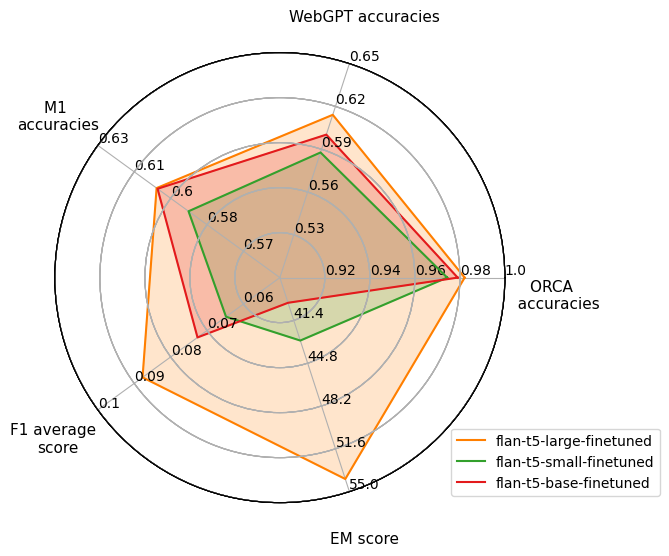

flan-t5-large
flan-t5-small
flan-t5-base


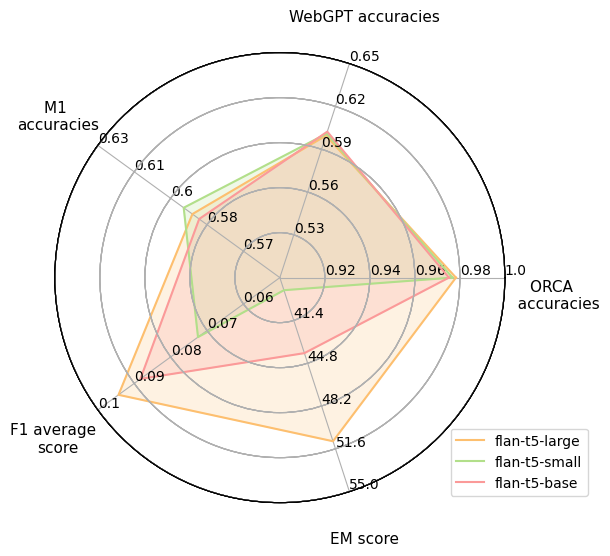

In [16]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        # print(d, y1, y2)
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables, fontsize=11)
        axes[0].tick_params(pad=25)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, bbox_legend, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
        self.ax.legend(loc='lower right', bbox_to_anchor=bbox_legend, fontsize = 10)
    def fill(self, data, alpha, color):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], alpha = alpha, color = color)



# example data
variables = ("\n\nORCA \n  accuracies", "WebGPT accuracies",  "M1 \naccuracies", "F1 average  \nscore", "EM score")
ranges = [(0.9,1), (0.5,0.65), (0.55,0.63),  (0.05,0.1), (38,55) ]
# plotting
fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables, ranges)

for i, model_name in enumerate(models_names[:3]):
    print(model_name)
    radar.plot(list(data[:,i])+[f1_data[i], EM[i]], (1.36, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data[:,i])+[f1_data[i], EM[i]], alpha=0.2, color = palette[model_name])
plt.savefig("plots/spider_plot_finetuned.png", dpi = 600,  bbox_inches="tight")
plt.show()

fig1 = plt.figure(figsize=(5, 5))
radar = ComplexRadar(fig1, variables, ranges)

for i, model_name in enumerate(models_names[3:6]):
    print(model_name)
    radar.plot(list(data[:,i+3])+[f1_data[i+3], EM[i+3]], (1.2, 0), label=model_name, color = palette[model_name])
    radar.fill(list(data[:,i+3])+[f1_data[i+3], EM[i+3]], alpha=0.2, color = palette[model_name])

plt.savefig("plots/spider_plot_base.png", dpi = 600,  bbox_inches="tight")
plt.show()

In [17]:
import sys
from PIL import Image

images = [Image.open(x) for x in ['plots/spider_plot_finetuned.png', 'plots/spider_plot_base.png']]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.size[0]

new_im.save('plots/final_spider_plot.jpg', dpi = (600,600))

In [159]:
models_names

['flan-t5-large-finetuned',
 'flan-t5-small-finetuned',
 'flan-t5-base-finetuned',
 'flan-t5-large',
 'flan-t5-small',
 'flan-t5-base',
 'bart-large',
 'bart-base']

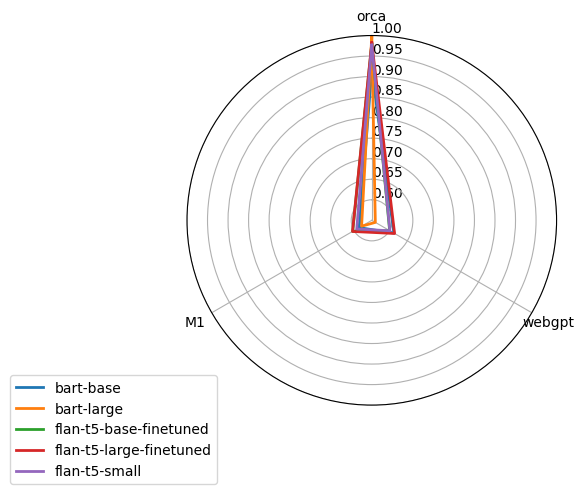

In [60]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot

ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0.55,1)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('models').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=models_names[0])
# ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('models').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=models_names[1])
# ax.fill(angles, values, 'r', alpha=0.1)

values=df.loc[2].drop('models').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=models_names[2])
# ax.fill(angles, values, 'r', alpha=0.1)

values=df.loc[3].drop('models').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=models_names[3])

values=df.loc[4].drop('models').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label=models_names[4])
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()